# Foodpanda Analysis

##  Objective
This project analyzes Foodpanda customer data to explore ordering behavior, satisfaction levels, and restaurant popularity across different demographics. It aims to identify key patterns based on factors such as gender, age, and city to understand customer preferences and highlight which food types, restaurants, and locations drive the most orders and satisfaction.

## COLUMN DESCRIPTION

| Column Name        | Description                                                                                   |
|-------------------|-----------------------------------------------------------------------------------------------|
| customer_id        | Unique identifier for each customer.                                                          |
| gender             | Gender of the customer (Male, Female, Other).                                                |
| age                | Age category of the customer (Teenager, Adult, Senior).                                      |
| city               | City where the customer is located (Multan, Lahore, Peshawar, Islamabad, Karachi).           |
| signup_date        | Date the customer registered on the platform.                                                |
| order_id           | Unique identifier for each order.                                                            |
| order_date         | Date when the order was placed.                                                              |
| restaurant_name    | Name of the restaurant from which the order was made (Subway, Pizza Hut, KFC, Burger King, McDonald's). |
| dish_name          | Name of the dish ordered (Pasta, Sandwich, Pizza, Fries, Burger).                            |
| category           | Category of the dish (Italian, Dessert, Fast Food, Continental, Chinese).                    |
| quantity           | Number of items ordered.                                                                     |
| price              | Price of the dish or total order amount.                                                     |
| payment_method     | Payment method used (Cash, Wallet, Card).                                                   |
| order_frequency    | How often the customer orders (per week/month).                                              |
| last_order_date    | Date of the customer’s last order.                                                          |
| loyalty_points     | Points earned by the customer in the loyalty program.                                        |
| churned            | Whether the customer is Active or Inactive.                                                 |
| rating             | Customer’s rating for the order (1–5 stars; may contain missing values).                    |
| rating_date        | Date the rating was given.                                                                   |
| delivery_status    | Status of the order delivery (Cancelled, Delayed, Delivered).                                |


##  Importing Required Libraries
We'll begin by importing all the necessary Python libraries for data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

import the dataset

In [3]:
df=pd.read_csv("Foodpanda Analysis Dataset.csv")

Display first 5 rows

In [16]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,NaN,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2.0,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3.0,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2.0,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,NaN,3/6/2025,Cancelled


In [4]:
df['gender'].value_counts()

gender
Female    2018
Male      2017
Other     1965
Name: count, dtype: int64

Total rows and columns in the dataset

In [17]:
df.shape

(6000, 20)

Basic information about the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

static summary of the dataset

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,6000.0,2.991667,1.414778,1.0,2.0000,3.00,4.0000,5.00
price,6000.0,800.524880,404.855029,100.3,441.9975,806.46,1149.7375,1499.95
order_frequency,6000.0,25.304667,14.358930,1.0,13.0000,25.00,37.0000,50.00
loyalty_points,6000.0,250.173667,144.608478,0.0,125.0000,249.50,378.0000,500.00
rating,4032.0,3.012153,1.411615,1.0,2.0000,3.00,4.0000,5.00


# Data cleaning

check null values

In [20]:
df.isna().sum()

customer_id           0
gender                0
age                   0
city                  0
signup_date           0
order_id              0
order_date            0
restaurant_name       0
dish_name             0
category              0
quantity              0
price                 0
payment_method        0
order_frequency       0
last_order_date       0
loyalty_points        0
churned               0
rating             1968
rating_date           0
delivery_status       0
dtype: int64

fill null values with mode

In [21]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

changing the datatype of date column

In [22]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['rating_date'] = pd.to_datetime(df['rating_date'])

Check duplicates

In [23]:
df.duplicated().sum()

np.int64(0)

Check outliers in the dataset

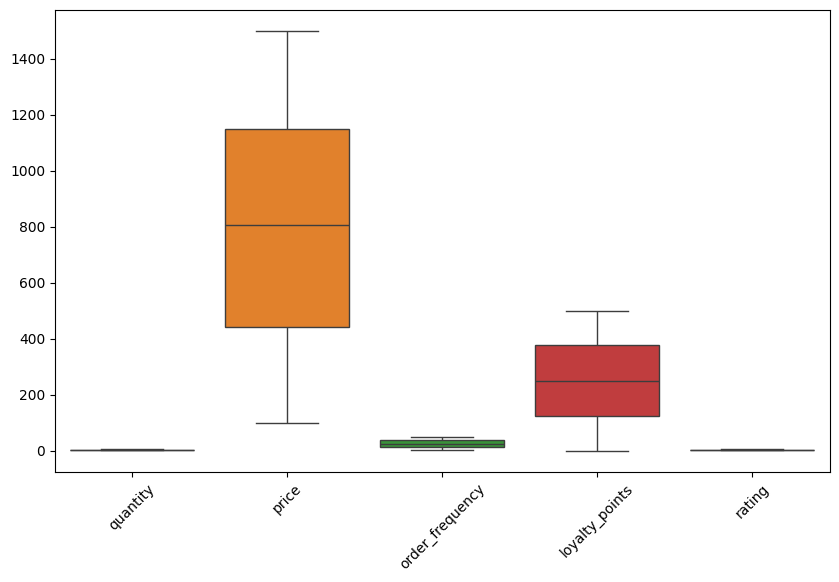

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(df[['quantity','price','order_frequency','loyalty_points','rating']])
plt.xticks(rotation = 45)
plt.show()

#### There is no outlier present in the columns

Check correlation

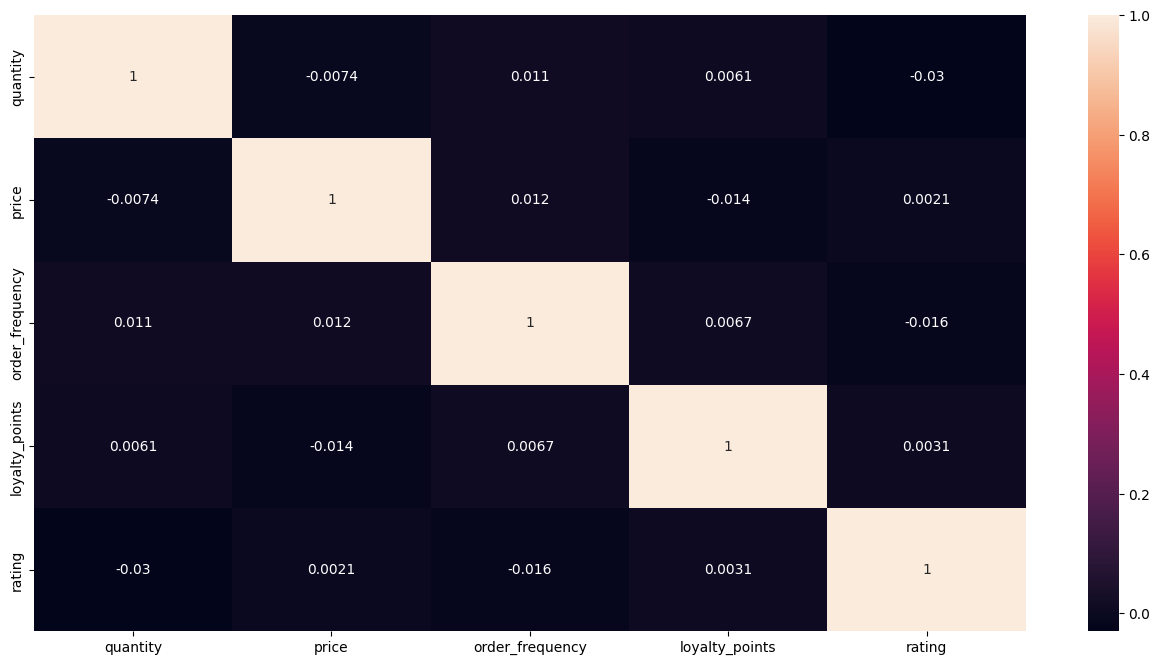

In [20]:
num_df = df.select_dtypes(include=['int','float'])
plt.figure(figsize=(16,8))
sns.heatmap(num_df.corr(),annot=True)
plt.show()

# Data Analysis

## 🔹which gender order mostly

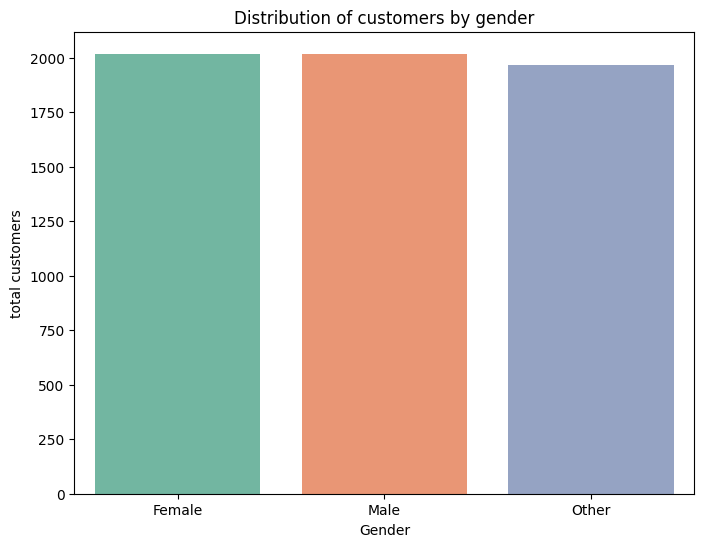

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
gender_order = df['gender'].value_counts().reset_index()
sns.barplot(data=gender_order,x='gender',y='count',palette="Set2",hue='gender',legend=False)
plt.title('Distribution of customers by gender')
plt.xlabel('Gender')
plt.ylabel('total customers')
plt.show()

#### Orders were almost equal for Male and Female customers, while the ‘Other’ category had noticeably fewer orders.

## 🔹which age group orders the most

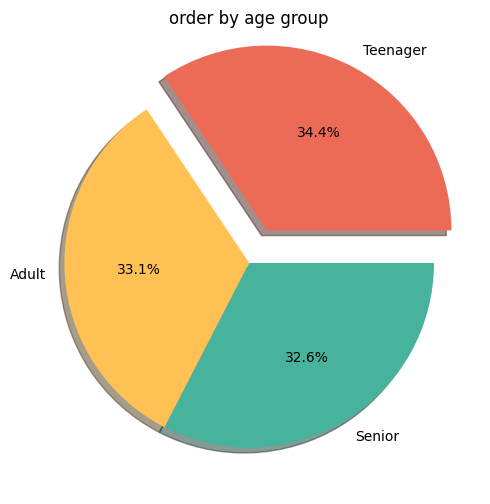

In [ ]:
age_count = df['age'].value_counts().reset_index()
plt.figure(figsize=(6,6))
plt.pie(age_count['count'],labels=age_count['age'],autopct='%1.1f%%',colors=['#EC6B56','#FFC154','#47B39C'],shadow=True,explode=[0.2,0,0])
plt.title('order by age group')
plt.show()

#### Based on the percentage of total orders, teenagers order slightly more than seniors and adults, and adults have the lowest order percentage

## 🔹Top Cities By Number Of Customers

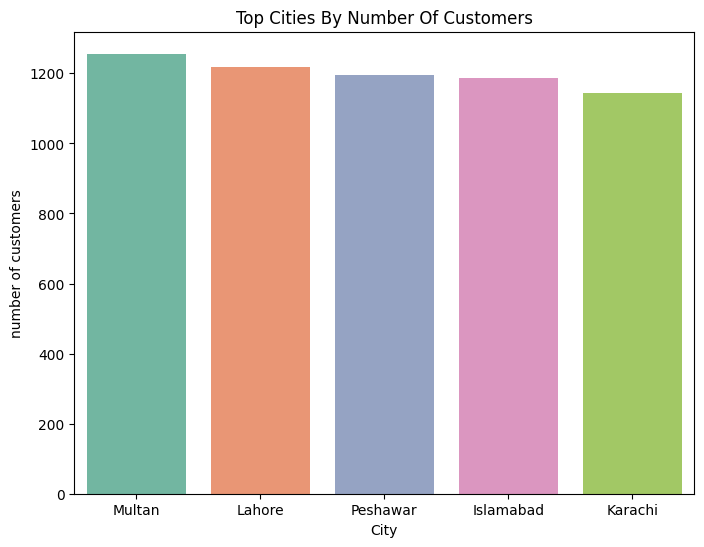

In [11]:
city_count = df['city'].value_counts().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=city_count,x='city',y='count',palette='Set2',hue='city',legend=False)
plt.xlabel('City')
plt.ylabel('number of customers')
plt.title('Top Cities By Number Of Customers')
plt.show()

#### Among all the cities, Multan has the highest number of customers, while Karachi has the lowest number of customers

## 🔹Most popular restaurent

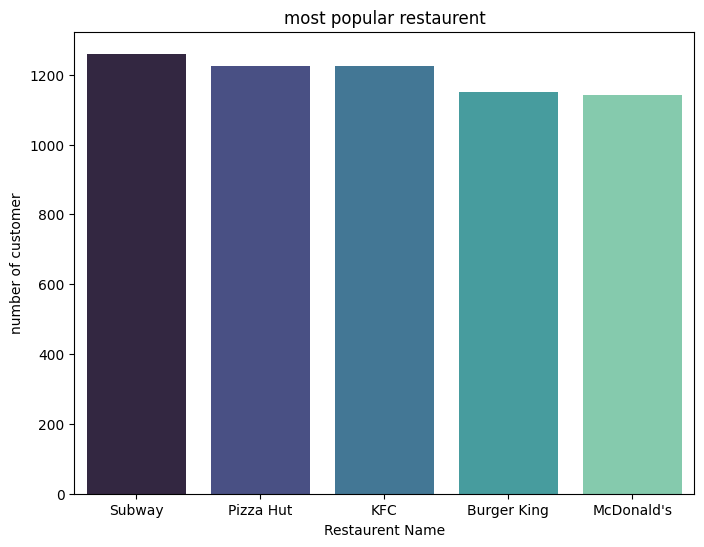

In [12]:
restaurent_count = df['restaurant_name'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(restaurent_count.index,restaurent_count.values)
sns.barplot(x=restaurent_count.index, y=restaurent_count.values, palette="mako",hue=restaurent_count.index,legend=False)
plt.xlabel('Restaurent Name')
plt.ylabel('number of customer')
plt.title('most popular restaurent')
plt.show()

#### Among all the restaurants, Subway is the most popular because it has the highest number of customers compared to the others

## 🔹 Most popular dishes

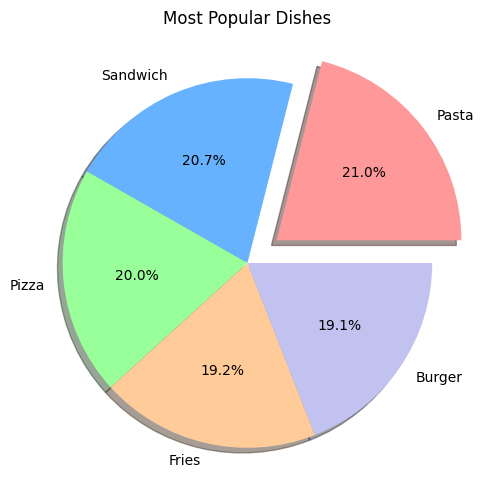

In [103]:
dish_count = df['dish_name'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dish_count.values,labels=dish_count.index,autopct='%1.1f%%',colors=["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0"],explode=[0.2,0,0,0,0],shadow=True)
plt.title('Most Popular Dishes')
plt.show()

#### Among all the dishes, Pasta is the most popular, while Burger is the least popular.

## 🔹 Most Popular Category

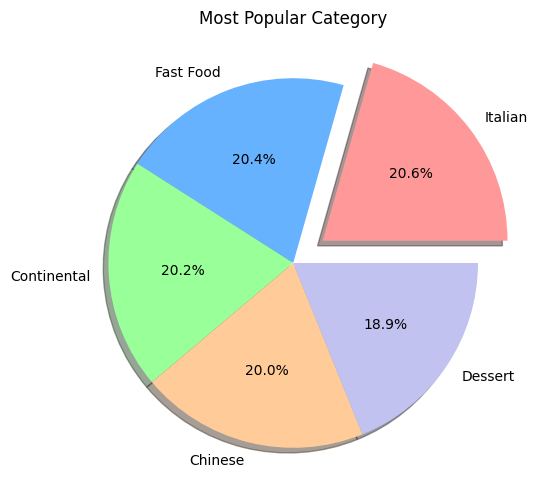

In [104]:
category_count = df['category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_count.values,labels=category_count.index,autopct='%1.1f%%',colors=["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0"],explode=[0.2,0,0,0,0],shadow=True)
plt.title('Most Popular Category')
plt.show()

#### Among all the categories, Italian is the most popular, while Dessert is the least popular.

## 🔹 Number of rating to each restaurent

In [105]:
rating_count = df.groupby(['restaurant_name','rating']).size().unstack()
rating_count

rating,1.0,2.0,3.0,4.0,5.0
restaurant_name,,,,,
Burger King,157,134,555,155,150
KFC,173,159,558,163,171
McDonald's,139,166,541,148,147
Pizza Hut,165,181,569,157,152
Subway,166,142,574,188,190


<Figure size 1200x800 with 0 Axes>

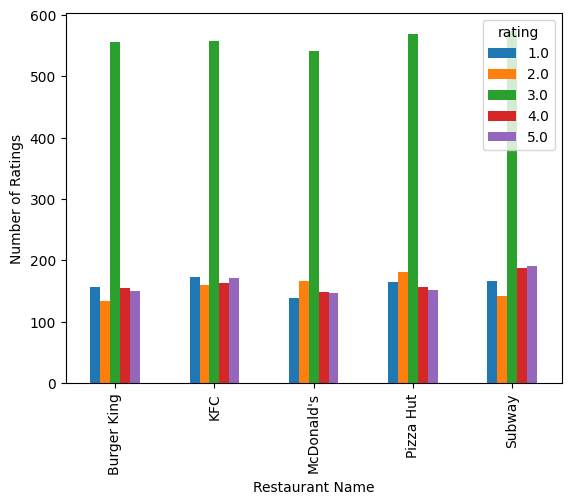

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
rating_count.plot(kind='bar',stacked=False)
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Ratings')
plt.show()

####  Subway has the highest number of 5-star ratings among all restaurants, while KFC has received the most 1-star ratings.

## 🔹customer rating distribution

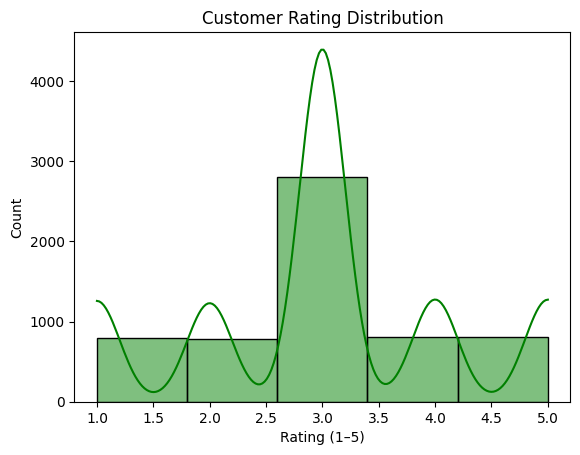

In [107]:
plt.figure()
sns.histplot(df["rating"], bins=5, kde=True, color="green")
plt.title("Customer Rating Distribution")
plt.xlabel("Rating (1–5)")
plt.show()

#### Most customers gave ratings between 2.5 and 3.5, with the peak around 3, indicating an average satisfaction level.Very few customers gave ratings of 1 or 5, showing that extreme dissatisfaction or extreme satisfaction is less common.

## 🔹 Distribution of loyalty points

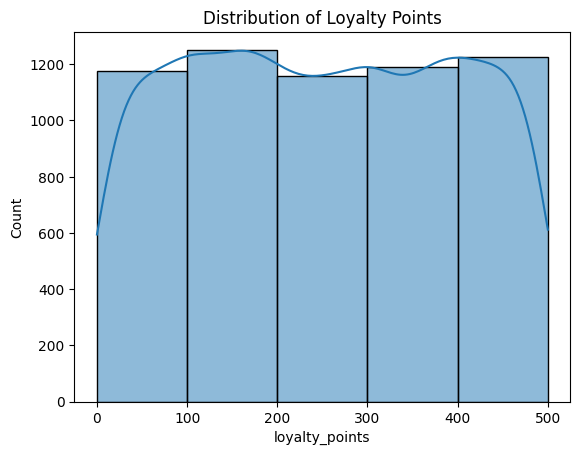

In [108]:
plt.figure()
sns.histplot(df["loyalty_points"], bins=5,kde=True)
plt.title("Distribution of Loyalty Points")
plt.show()

#### The majority of customers have a moderate number of loyalty points, typically between 100 and 400. Only a small fraction of customers fall at the extremes, either with very low points (0–50) or very high points (450–500).

## 🔹average order value across cities

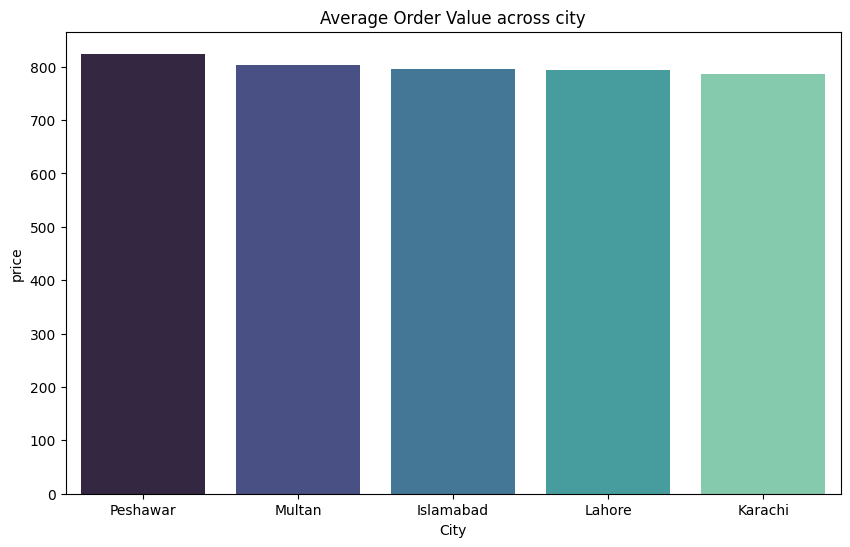

In [8]:
average_order = df.groupby('city')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=average_order.index,y=average_order.values,palette='mako',hue=average_order.index,legend=False)
plt.xlabel('City')
plt.ylabel('price')
plt.title('Average Order Value across city')
plt.show()

#### Peshawar has the highest average order value among all cities, while Karachi has the lowest

## 🔹 Number of Active and Inactive Users

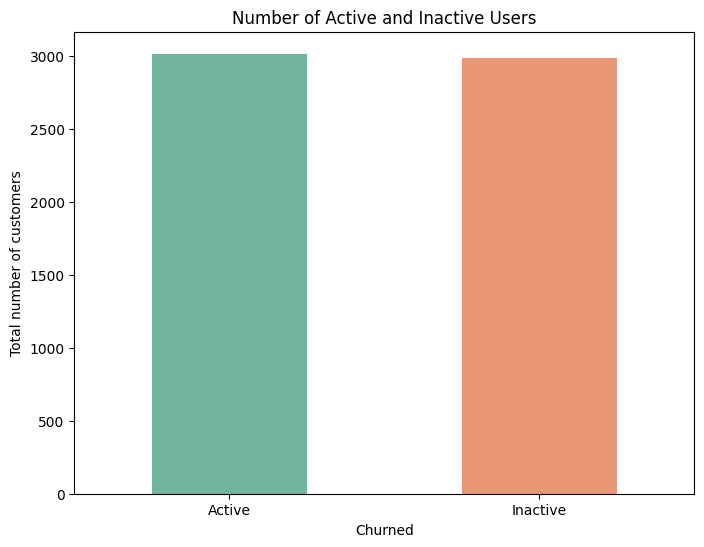

In [162]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='churned',width=0.5,palette='Set2',hue='churned',legend=False)
plt.title('Number of Active and Inactive Users')
plt.xlabel('Churned')
plt.ylabel('Total number of customers')
plt.show()

#### The number of active users is slightly higher than inactive users.

## 🔹Delivery status VS Total no of customers

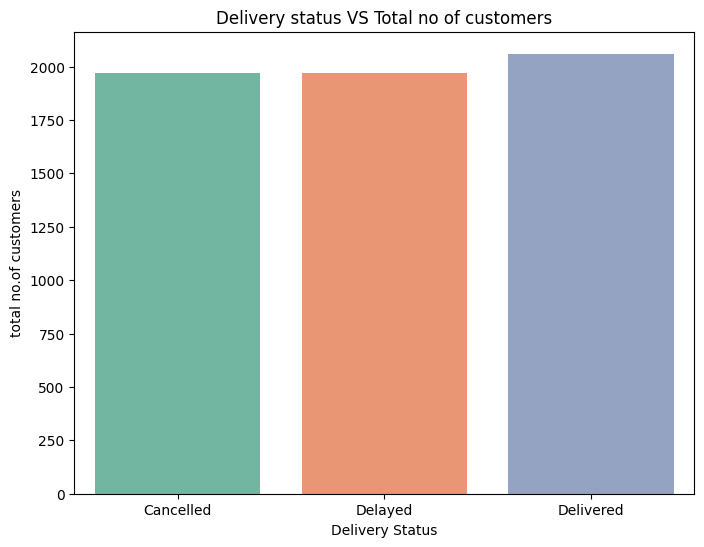

In [164]:
plt.figure(figsize=(8,6))
sns.countplot(x='delivery_status',data=df,palette='Set2',hue='delivery_status',legend=False)
plt.xlabel('Delivery Status')
plt.ylabel('total no.of customers')
plt.title('Delivery status VS Total no of customers')
plt.show()

#### Most customers fall under the Delivered category, followed closely by Cancelled and Delayed deliveries. This suggests that while the delivery process is generally successful, a noticeable portion of orders still face cancellations and delays.

## 🔹 What’s the average time between first and last order?

In [10]:
customer_life_cycle = df.groupby('customer_id').agg(first_order= ('order_date','min'), last_order=('last_order_date','max'))
customer_life_cycle['time difference'] = (customer_life_cycle['last_order'] - customer_life_cycle['first_order']).dt.days
avg_time = (customer_life_cycle['time difference'].mean())
print("Average time between first and last order (in days):", round(avg_time), "Days")

Average time between first and last order (in days): 184 Days


## 🔹which year high orders recieved

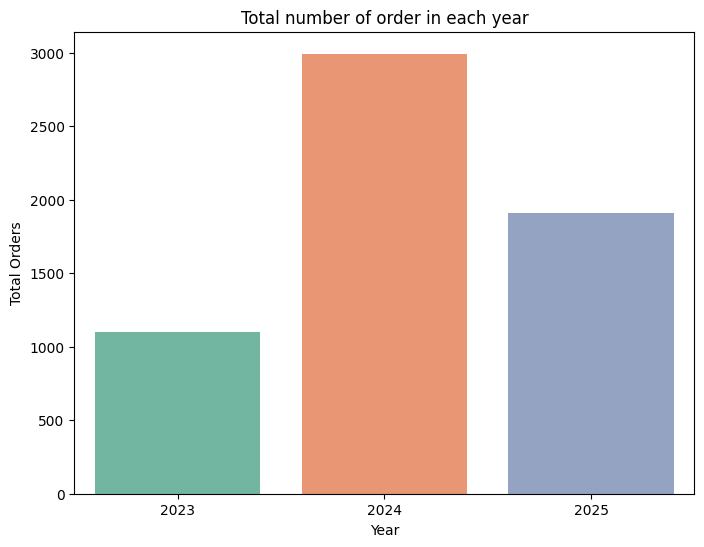

In [260]:
df['year'] = df['order_date'].dt.year
yearly_orders= df['year'].value_counts().sort_index().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=yearly_orders,x='year',y='count',palette='Set2',hue='year',legend=False)
plt.title("Total number of order in each year")
plt.xlabel("Year")
plt.ylabel("Total Orders")
plt.show()

#### The highest number of orders were received in 2024, while the number of orders in 2025 was much lower compared to 2024. The year 2023 recorded the lowest number of orders among all.

## 🔹How many new customers signed up each year?

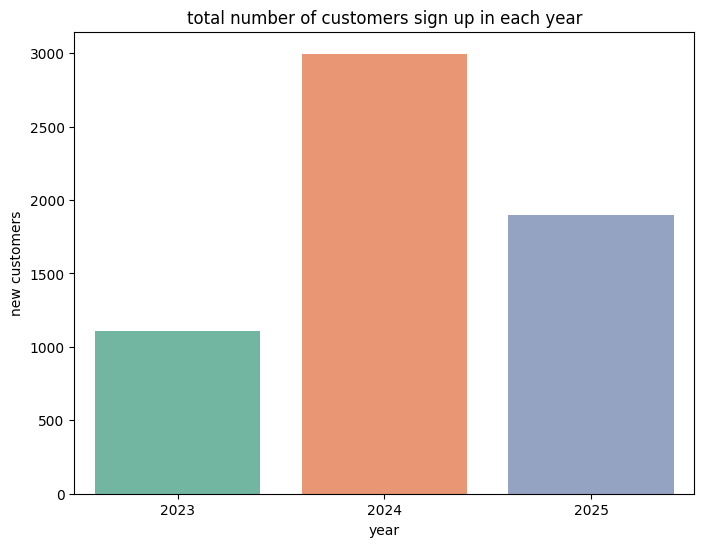

In [278]:
df['signup_year']= df['signup_date'].dt.year
new_customers = df.groupby('signup_year')['customer_id'].nunique().reset_index(name='new_customers')
plt.figure(figsize=(8,6))
sns.barplot(data=new_customers,x='signup_year',y='new_customers',palette='Set2',hue='signup_year',legend=False)
plt.title('total number of customers sign up in each year')
plt.xlabel('year')
plt.ylabel('new customers')
plt.show()

#### In 2024, the highest number of new customers signed up. In 2025, the number of sign-ups was much lower compared to 2024, while 2023 recorded the lowest number of new customer sign-ups among all years.